## import

In [104]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

## initialization
pix
x0                      y [0 - 255]
x1
x2
x3
x4
x5
x6
x7


<!-- 
red:
x1 x2 x3
x4 y  x5
x6 x7 x8 
-->

In [105]:
# variables
features = 8
y = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,[None,features])
w = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros(1))

# functions
pred = tf.matmul(x, w) + b 
loss = tf.reduce_mean(tf.pow(pred - y, 2))
alfa = 0.000004
update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)

## data function

In [106]:
def get_XY_from_image(photo_name:str,color:int,jumps:int=100,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])} name: {photo_name}")
    for i in range(1,len(color_arr)-1,jumps):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    return (data_x,data_y)

def load_pic_data(pics_array,color:int,jumps:int=100,show:bool=False):
    data_x , data_y = get_XY_from_image(pics_array[0],color,jumps,show)
    for i in pics_array[1:]:
        data_tmp_x , data_tmp_y = get_XY_from_image(i,color,jumps,show)
        data_x = np.append(data_x,data_tmp_x,axis=0)
        data_y = np.append(data_y,data_tmp_y,axis=0)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x,data_y

## get data

In [107]:
data_x , data_y = load_pic_data(
    ["data/cat_test.jpg","data/balloon.jpg","data/cat.jpg","data/city.jpg","data/city_night.jpg","data/city_color.jpg",
    "data/flower.jpg"],
    color=0,jumps=100)
data_t_x , data_t_y = load_pic_data(["data/cat_test.jpg","data/park.jpg"],color=0,jumps=100)


pic size: 681x1024 name: data/cat_test.jpg
pic size: 480x720 name: data/balloon.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 664x1080 name: data/city.jpg
pic size: 1282x2278 name: data/city_night.jpg
pic size: 539x959 name: data/city_color.jpg
pic size: 600x800 name: data/flower.jpg
pic size: 681x1024 name: data/cat_test.jpg
pic size: 588x830 name: data/park.jpg


## running the sim

In [108]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,10000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>100):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w))
              if(i%(show*10)==0):
                     print(f"i = {i}, loss = {tmp}")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))
              #  w = {sess.run(w)}, b = {sess.run(b)},


i = 200, loss = 97.04254913330078
i = 300, loss = 90.02916717529297
i = 400, loss = 83.81478881835938
i = 500, loss = 78.30628967285156
i = 600, loss = 73.4224853515625
i = 700, loss = 69.09192657470703
i = 800, loss = 65.25154113769531
i = 900, loss = 61.84553146362305
i = 1000, loss = 58.82453155517578
i = 1100, loss = 56.14483642578125
i = 1200, loss = 53.76771926879883
i = 1300, loss = 51.65890121459961
i = 1400, loss = 49.787967681884766
i = 1500, loss = 48.128021240234375
i = 1600, loss = 46.6551628112793
i = 1700, loss = 45.34825897216797
i = 1800, loss = 44.18856430053711
i = 1900, loss = 43.1594352722168
i = 2000, loss = 42.24613952636719
i = 2100, loss = 41.435611724853516
i = 2200, loss = 40.71625518798828
i = 2300, loss = 40.07777786254883
i = 2400, loss = 39.51106643676758
i = 2500, loss = 39.00802993774414
i = 2600, loss = 38.56149673461914
i = 2700, loss = 38.165096282958984
i = 2800, loss = 37.81319808959961
i = 2900, loss = 37.50078201293945
i = 3000, loss = 37.2234115

## printing and testing

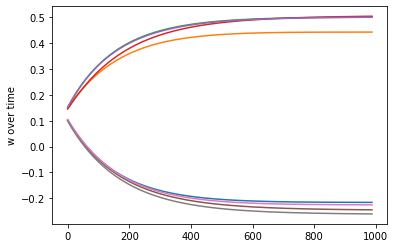

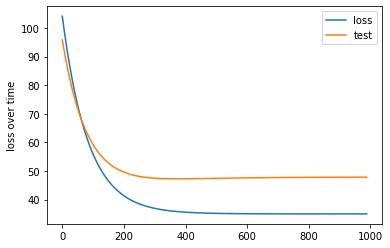

In [109]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

# data_x , data_y = get_XY_from_image("cat.jpg",0)

# print(f"loss test: {sess.run(loss,feed_dict={x:data_x,y:data_y})}")

# print(f"w = {sess.run(w)}")
# print(f"b = {sess.run(b)} ")
# print(f"predict = {np.matmul([5,15,10],sess.run(w))+sess.run(b)}")